In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('./Reviews.csv/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text Processing

In [3]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [6]:
df['Text'] = df['Text'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace(r'[^\w\s]','')

print(df['Text'].head(5))

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price. there was a wide...
Name: Text, dtype: object


In [8]:
# Removing Stopwords

stop=stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x:" ".join(x.lower() for x in x.split() if x not in stop))


In [9]:
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

Lemmaization

In [11]:
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob

In [14]:

df['Text'] = df['Text'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split()]))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

In [15]:
reviews = df
reviews.dropna(inplace= True)

In [16]:
df.shape

(568401, 10)

In [17]:
reviews.shape

(568401, 10)

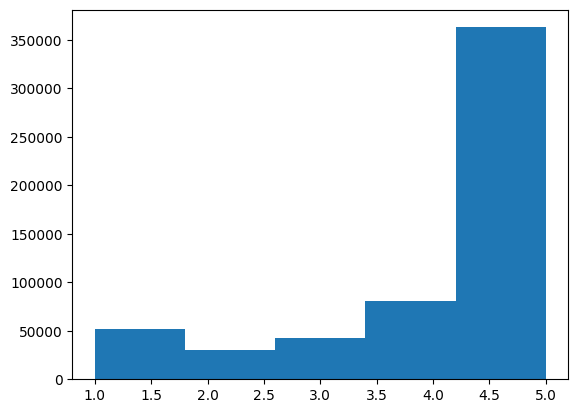

Score
1     52264
2     29743
3     42638
4     80654
5    363102
Name: Id, dtype: int64


In [18]:
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [19]:
score_1 = reviews[reviews['Score'] == 1].sample(n=29743)
score_2 = reviews[reviews['Score'] == 2].sample(n=29743)
score_3 = reviews[reviews['Score'] == 3].sample(n=29743)
score_4 = reviews[reviews['Score'] == 4].sample(n=29743)
score_5 = reviews[reviews['Score'] == 5].sample(n=29743)

In [20]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True , inplace=True)

In [21]:
reviews_sample.shape

(148715, 10)

In [23]:
reviews_sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,426338,B003BJOORW,A3IE3TQ79W0YOR,Ryan Johnson,9,13,1,1280793600,Please avoid!!,please research pet food actually good cats. h...
1,306123,B003THQKXM,A2TOO8WCGY5VFG,JB,10,12,1,1322524800,feel like i was dupped.,saw online deal. ordered thinking would receiv...
2,120822,B005K4Q37A,A1IIOT12XJ3OGA,"terryjane ""haltjv""",1,1,1,1339286400,HORRIBLE HORRIBLE PRODUCT - YUCK!!!!,horrible product! tried one throw 23 out! wast...
3,139678,B001BCXTGS,AF3BYMPWKWO8F,Joe MacBu,20,23,1,1243555200,Warning: Contains Menadione,"according manufacturer's website, (and many pr..."
4,142414,B0014EW5MW,A2FVK9BQOVIYUN,Ben Hollywood,1,2,1,1332028800,Huge price increase,loved til saw recent price increase. subscript...


In [24]:
print(reviews_sample.groupby('Score').count().Id)

Score
1    29743
2    29743
3    29743
4    29743
5    29743
Name: Id, dtype: int64


In [25]:
from wordcloud import WordCloud,STOPWORDS

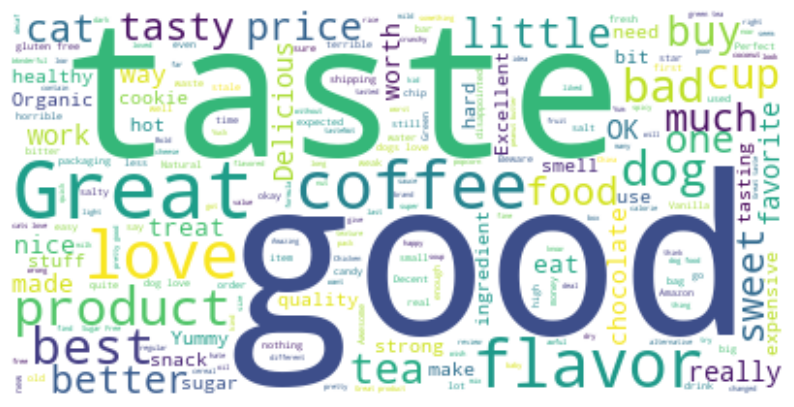

In [26]:
reviews_str = reviews_sample.Summary.str.cat()
Wordcloud = WordCloud(background_color= 'White').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(Wordcloud,interpolation='bilinear')
plt.axis("OFF")
plt.show()

In [28]:
reviews_sample[reviews_sample['Score'] == 1]['Text'].loc[0]

'please research pet food actually good cats. hill science diet horrible food filled horrible ingredients. charge outrageous price #1 vet recommended food. joke reason rated #1 buy vet hill give money soon vet help go school. sell cat food cheap jack price make nice profit marketing foolishness. read back label hill brand see top ingredient grain cheap meat product feathers, bones, unwanted organ animals, basically stuff eat. try something like orijen evo.'

In [29]:
#split negative score and positive score
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]
#transform into single string

negative_reviews_str=negative_reviews.Summary.str.cat()
positive_reviews_str=positive_reviews.Summary.str.cat()


In [31]:
wordcloud_negative = WordCloud(background_color= 'White').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color= 'White').generate(positive_reviews_str)

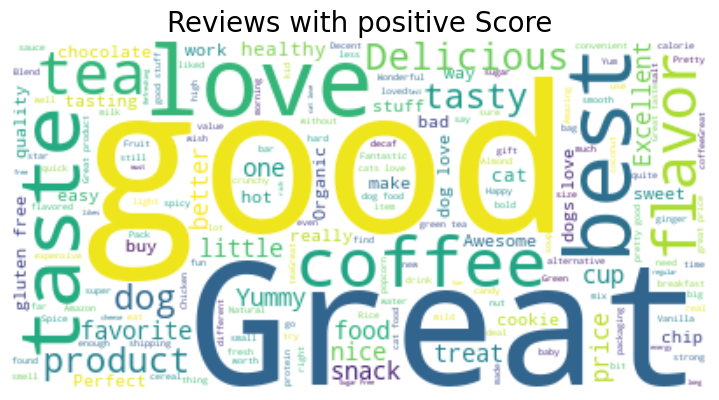

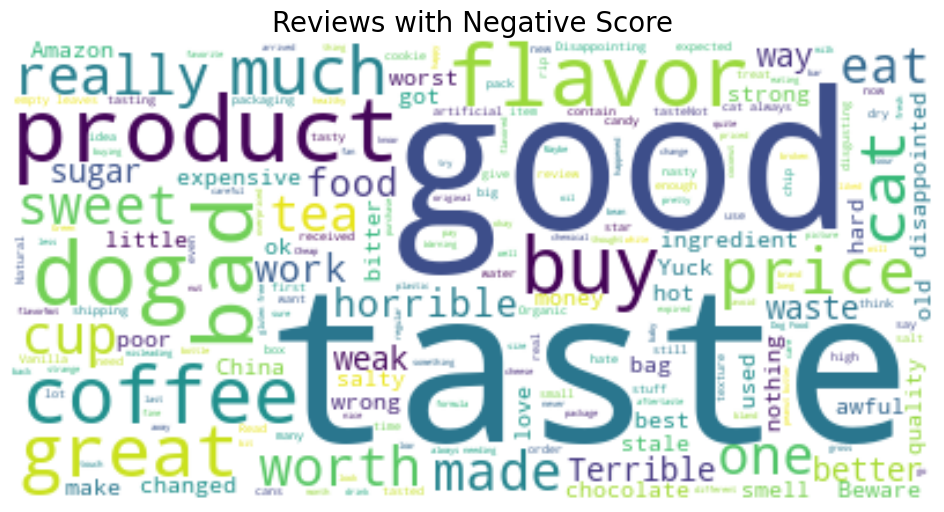

In [33]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,1,1)
ax1.imshow(wordcloud_positive , interpolation="bilinear")
ax1.axis("OFF")
ax1.set_title("Reviews with positive Score",fontsize=20)

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(2,1,1)
ax1.imshow(wordcloud_negative , interpolation="bilinear")
ax1.axis("OFF")
ax1.set_title("Reviews with Negative Score",fontsize=20)

plt.tight_layout()
plt.show()

Sentiment Score

In [34]:
import seaborn as sns
import re
import os
import sys
import ast

plt.style.use('fivethirtyeight')

In [35]:
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [37]:
emptyline = []
for row in tqdm(df['Text'] , total= len(df) , desc="Analyzing Sentiment "):
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

df_sentiments = pd.DataFrame(emptyline)
df_sentiments.head(5)

Analyzing Sentiment : 100%|██████████| 568401/568401 [05:38<00:00, 1680.31it/s]


,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.123,0.608,0.268,0.8532
3,0.000,0.868,0.132,0.4404
4,0.000,0.369,0.631,0.9468


In [39]:
np.where(df_sentiments['compound'] >= 0 , 'Positive' , 'Negaive')


array(['Positive', 'Negaive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype='<U8')

In [40]:
df_sentiments['Sentiment'] = np.where(df_sentiments['compound'] >= 0 , 'Positive' , 'Negaive')
df_sentiments.head(5)

,neg,neu,pos,compound,Sentiment
0,0.000,0.517,0.483,0.9413,Positive
1,0.129,0.762,0.110,-0.1027,Negaive
2,0.123,0.608,0.268,0.8532,Positive
3,0.000,0.868,0.132,0.4404,Positive
4,0.000,0.369,0.631,0.9468,Positive


In [41]:
df_sentiments['Sentiment'].value_counts()

Sentiment
Positive    527789
Negaive      40612
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

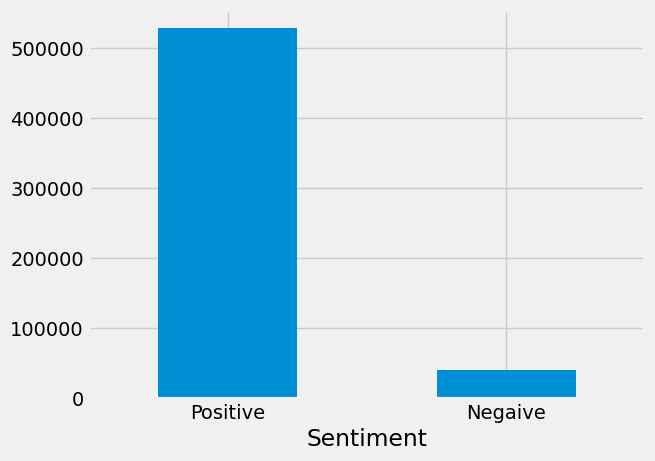

In [46]:
result=df_sentiments['Sentiment'].value_counts()
result.plot(kind='bar',rot=0)
